## Import necessary packages ‼️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For formatting the percentage axis
import seaborn as sns

## 👀 Read each csv file individually

In [2]:
df1 = pd.read_csv("/home/etiuzale-clinton/Documents/Tech Crush Task/Pizza+Place+Sales/pizza_sales/pizzas.csv")
df2 = pd.read_csv("/home/etiuzale-clinton/Documents/Tech Crush Task/Pizza+Place+Sales/pizza_sales/order_details.csv")
df3 = pd.read_csv("/home/etiuzale-clinton/Documents/Tech Crush Task/Pizza+Place+Sales/pizza_sales/orders.csv")
df4 = pd.read_csv("/home/etiuzale-clinton/Documents/Tech Crush Task/Pizza+Place+Sales/pizza_sales/pizza_types.csv", encoding='cp1252')
d_data = pd.read_csv("/home/etiuzale-clinton/Documents/Tech Crush Task/Pizza+Place+Sales/pizza_sales/data_dictionary.csv")


### Define the dataframes
- df1 = pizzas.csv
- df2 = order_details.csv
- df3 = orders.csv
- df4 = pizza_types.csv
- d_data = data_dictionary.csv

## 🎯 Guidelines 
- Merge files into one dataframe
- Exploratory Analysis
- Visually and explain findings

In [3]:
#Dictionary of the entire datasets

d_data

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


### D1 & D4 merge

In [4]:
df1.head(10)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
5,cali_ckn_l,cali_ckn,L,20.75
6,ckn_alfredo_s,ckn_alfredo,S,12.75
7,ckn_alfredo_m,ckn_alfredo,M,16.75
8,ckn_alfredo_l,ckn_alfredo,L,20.75
9,ckn_pesto_s,ckn_pesto,S,12.75


In [5]:
df1.shape

(96, 4)

In [6]:
df4.shape

(32, 4)

In [7]:
df4.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


### First = Full Outer Merge

In [8]:
first = pd.merge(df1,df4, on='pizza_type_id')
first.head(10)

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
5,cali_ckn_l,cali_ckn,L,20.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
6,ckn_alfredo_s,ckn_alfredo,S,12.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
7,ckn_alfredo_m,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
8,ckn_alfredo_l,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
9,ckn_pesto_s,ckn_pesto,S,12.75,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."


In [9]:
first.duplicated().sum().item()

0

In [10]:
first.shape

(96, 7)

In [11]:
first.set_index("pizza_id", inplace= True)

## D2 & D3 Merge

In [12]:
df3.shape

(21350, 3)

In [13]:
df2.shape

(48620, 4)

In [14]:
df3.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [15]:
df2.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


### Second = Full Outer Merge 

In [16]:
second = pd.merge(df2,df3, on='order_id')
second.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [17]:
second.shape

(48620, 6)

In [18]:
second.duplicated().sum().item()

0

In [19]:
second.set_index('pizza_id', inplace= True)

### Merge into all dataframes into a singular csv called 'df'

In [20]:
df = pd.merge(first,second, 
                left_index= True,
                right_index= True,
                how= 'inner')
df.head(10)

,pizza_type_id,size,price,name,category,ingredients,order_details_id,order_id,quantity,date,time
pizza_id,,,,,,,,,,,
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,1,2015-01-01,12:29:36
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,1,2015-01-02,17:54:04
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,1,2015-01-02,20:12:34
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,1,2015-01-03,21:21:24
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,1,2015-01-04,12:12:05
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",874,387,1,2015-01-07,13:03:14
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",881,388,1,2015-01-07,13:04:56
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",925,403,1,2015-01-07,16:26:10
bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",1184,522,1,2015-01-09,14:09:33


In [21]:
df.reset_index(inplace=True)

In [22]:
df.duplicated().sum().item()

0

In [23]:
df.isna().sum()

pizza_id            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
order_details_id    0
order_id            0
quantity            0
date                0
time                0
dtype: int64

In [24]:
# Merge the date and time column into a singluar column as DATETIME

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.drop(['date', 'time'], axis=1, inplace=True)

In [25]:
df.head(10)

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_details_id,order_id,quantity,datetime
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,1,2015-01-01 12:29:36
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,1,2015-01-02 17:54:04
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,1,2015-01-02 20:12:34
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,1,2015-01-03 21:21:24
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,1,2015-01-04 12:12:05
5,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",874,387,1,2015-01-07 13:03:14
6,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",881,388,1,2015-01-07 13:04:56
7,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",925,403,1,2015-01-07 16:26:10
8,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",1184,522,1,2015-01-09 14:09:33
9,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",1257,555,1,2015-01-09 20:18:25


In [26]:
df.to_csv('merged_dataset.csv')

##

## Exploratory Analysis
- Recommended Analysis
    1. What is the total revenue/sales?
    2. Find the total quantity sold.
    3. Find the total orders.
    4. How many pizza types do they sell?
    5. Find the average price of the pizzas.
    6. What are the peak hours of sales?
    7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?
    8. Find the top 5 bestselling pizzas.
    9. Find the sales made in each month. Any trend noticeable?
    10. Are there pizza types that are not doing well on the menu?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_details_id  48620 non-null  int64         
 8   order_id          48620 non-null  int64         
 9   quantity          48620 non-null  int64         
 10  datetime          48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 4.1+ MB


### ❓1. What is the total revenue/sales?

In [28]:
# Total Revenue

total_revenue = (df['price'] * df['quantity']).sum()
print(f"Total Revenue = ${total_revenue:.2f}")
print()

Total Revenue = $817860.05



### ❓2. Find the total quantity sold.

In [29]:
# Total Quantity Sold

total_quantity_sold = df['quantity'].sum()
print(f"Total Quantity Sold = {total_quantity_sold}")
print()

Total Quantity Sold = 49574



### ❓3. Find the total orders.

In [30]:
# Total Orders

total_orders = df['order_id'].nunique()
print(f'Total Orders = {total_orders}')

Total Orders = 21350


### ❓4. How many pizza types do they sell?

In [31]:
pizza_types = df['pizza_type_id'].nunique()
print(f"Pizza types sold: {pizza_types}\n")

Pizza types sold: 32



### ❓5. Average price of the pizzas


In [32]:
avg_price = df['price'].mean()
print(f"Average price: {avg_price:.2f}\n")

Average price: 16.49



### ❓6. What are the peak hours of sales?

/tmp/ipykernel_29148/1649054028.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


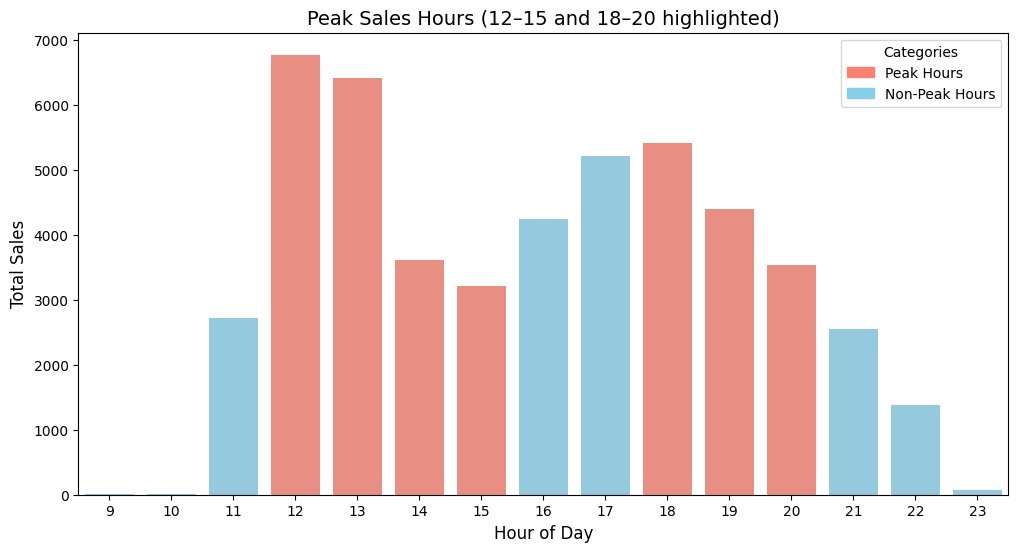

In [33]:
# --- Replace 'timestamp_column' with the actual name of your datetime column ---

df['hour'] = df['datetime'].dt.hour

# # Calculate hourly sales and sort by hour (0–23)

hourly_sales = df.groupby('hour')['quantity'].sum().reset_index().sort_values('hour')


# # Create a list of colors based on peak hours

colors = [
    'salmon' if 12 <= hour <= 15 or 18 <= hour <= 20 
    else 'skyblue' 
    for hour in hourly_sales['hour']
]

# Plot

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='hour', 
    y='quantity', 
    data=hourly_sales, 
    palette=colors  # Assign colors directly
)
plt.title('Peak Sales Hours (12–15 and 18–20 highlighted)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Add legend for clarity

legend_labels = ['Peak Hours', 'Non-Peak Hours']
handles = [
    plt.Rectangle((0,0), 1, 1, color='salmon'),
    plt.Rectangle((0,0), 1, 1, color='skyblue')
]
plt.legend(handles, legend_labels, title='Categories')

plt.show()

### Insights
- The peak sales are between 12pm - 3pm and 6 - 8pm respectively, work flow should be observant more from noon till end of day to attend to more customers

### ❓7. 
### a. Find the total sales made on each day of the week. 
### b. Which day of the week is when sales are made the most?

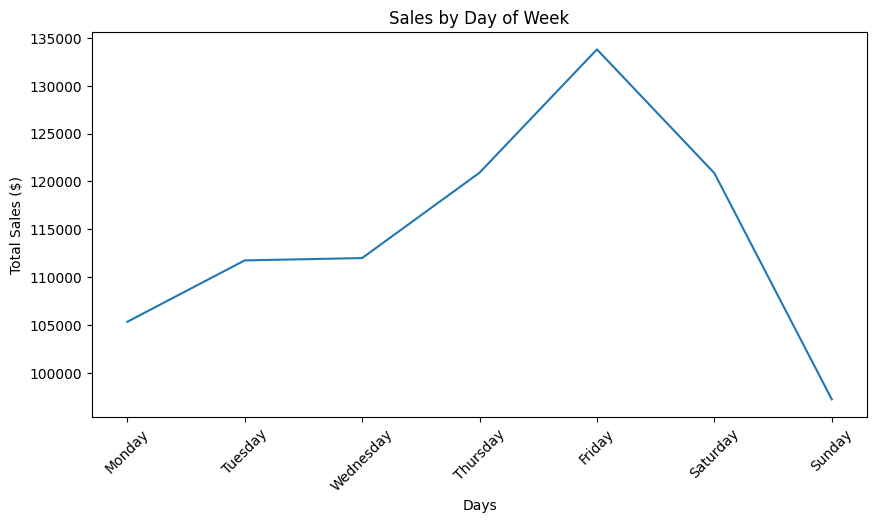

In [34]:
# Find the total sales made on each day of the week. 

df['day_of_week'] = df['datetime'].dt.day_name()

# - Groupby the sum of the price by the day of the week column created and reindex to actual days

daily_sales = df.groupby('day_of_week')['price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


# Plot which day of the week has most sales

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, markers='o')
plt.title("Sales by Day of Week")
plt.xlabel('Days')
plt.xticks(rotation = 45)
plt.ylabel('Total Sales ($)')
plt.show()

### Insights 
- Fridays draws the highest sales report of above $130,000, so introducing more offers on the menu and appeals could increase sales for these days

### ❓8. Find the top 5 bestselling pizzas.

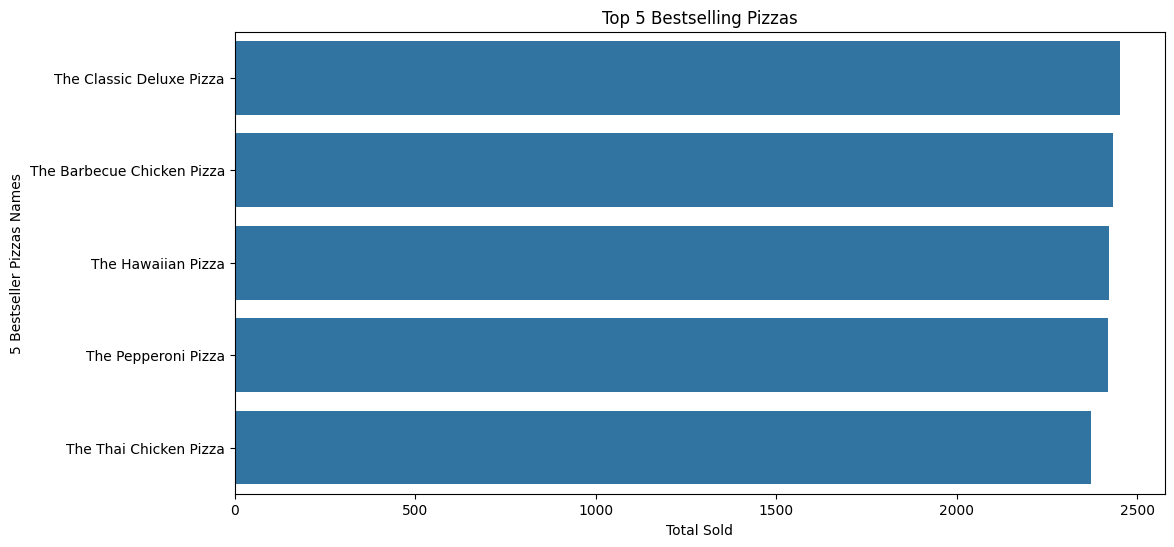

In [35]:
# Group total quantity by the 5 largest pizza names

top_pizzas = df.groupby('name')['quantity'].sum().nlargest(5)

# Visualize the Top 5 bestsellers

plt.figure(figsize=(12, 6))
sns.barplot(x = top_pizzas.values, y = top_pizzas.index)
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Total Sold')
plt.ylabel('5 Bestseller Pizzas Names')
plt.show()

### Insights
- The Top 5 sellers are observed here sold more than 2000 Pizzas

### ❓9. Find the sales made in each month. Any trend noticeable?

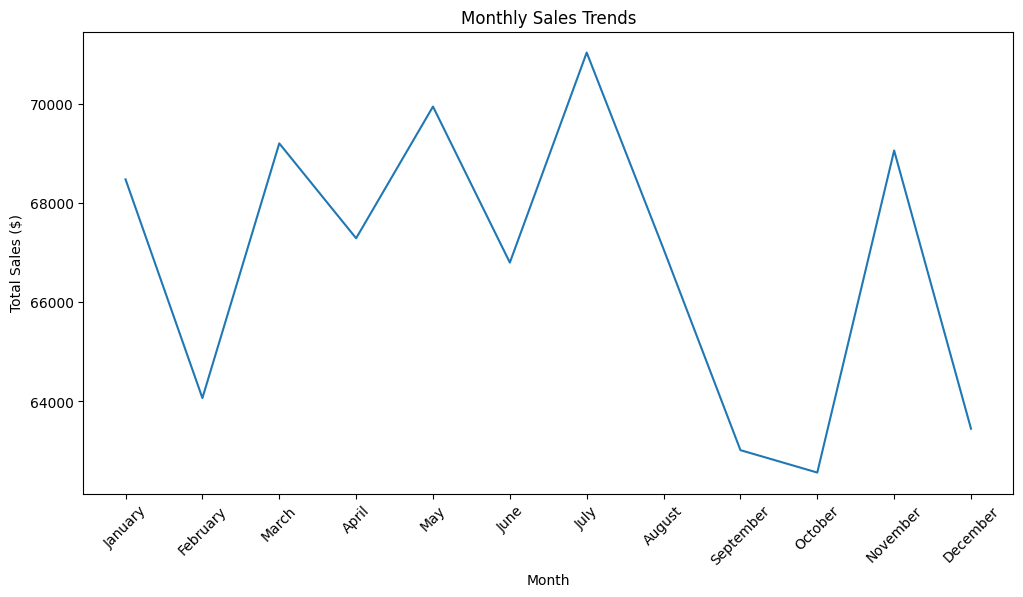

In [36]:
# -Extract the month from the datetime

df['month'] = df['datetime'].dt.month_name()

# -Groupby total price by each month and reindex into each month for the year

monthly_sales = df.groupby('month')['price'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# Visually explain noticeable trends

plt.figure(figsize=(12,6))
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values, markers='o')
plt.title("Monthly Sales Trends")
plt.xlabel('Month')
plt.ylabel("Total Sales ($)")
plt.xticks(rotation = 45)
plt.show()


### Insights
- In the Summer season, sales goes up 📉 as high as above $70,000.

- During the Winter season, sales goes as low as $64,000 📈; Introducing exiciting offers could help during this seasons

### ❓10. Are there pizza types that are not doing well on the menu?

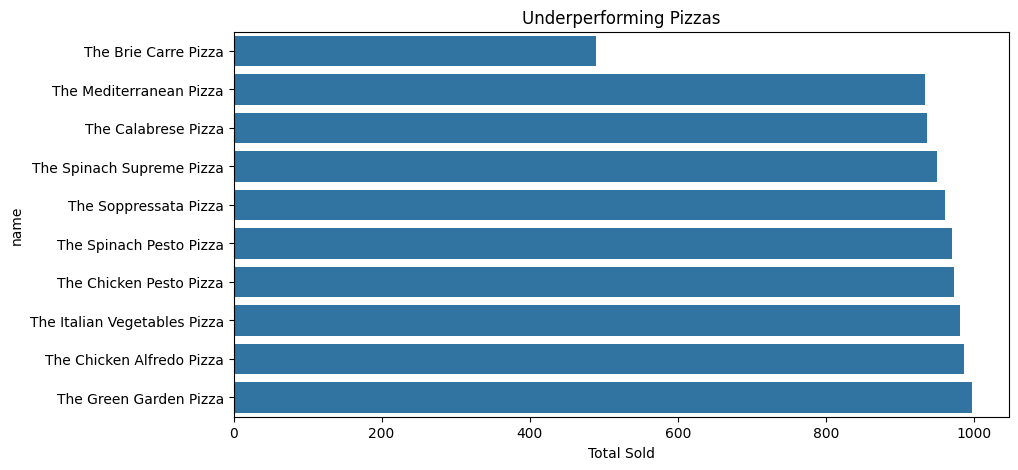

In [37]:
# Groupby the total quantity by the 10 smallest pizza names

least_pizzas = df.groupby('name')['quantity'].sum().nsmallest(10)

# Visualize the outcome

plt.figure(figsize=(10,5))
sns.barplot(x = least_pizzas.values, y = least_pizzas.index)
plt.title("Underperforming Pizzas")
plt.xlabel("Total Sold")
plt.show()

### Insights 
- The least sold among the batch here is "The Brie Carre Pizza" so it is important to understand how to improve sales by experimenting new introductions or discounts on this product

### ❓11. Find the most sold category in the pizza section

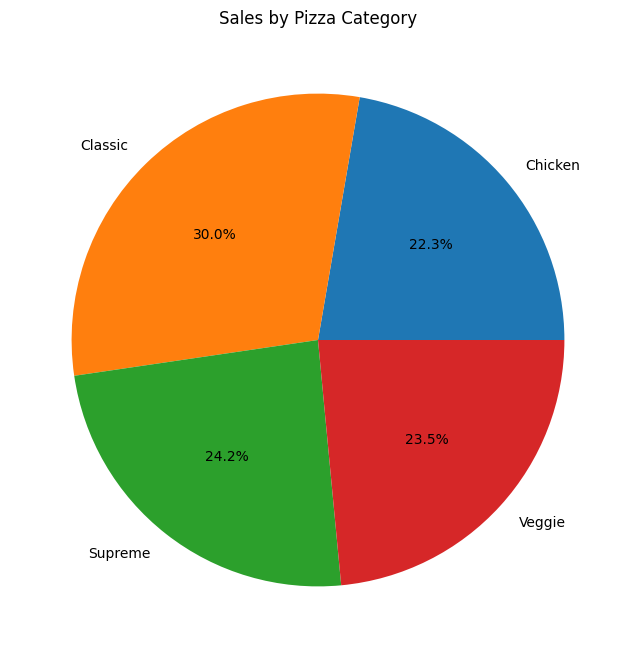

In [38]:
# Category Distribution of the pizza section

category_sales = df.groupby('category')['quantity'].sum()

# Plot the outcome

plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Sales by Pizza Category')
plt.show()

### Insights
- The Classic Pizza has the highest demand among the others
- The Chicken Pizza has a slightly lower demand than the rest

### ❓12. Does size of pizza change?

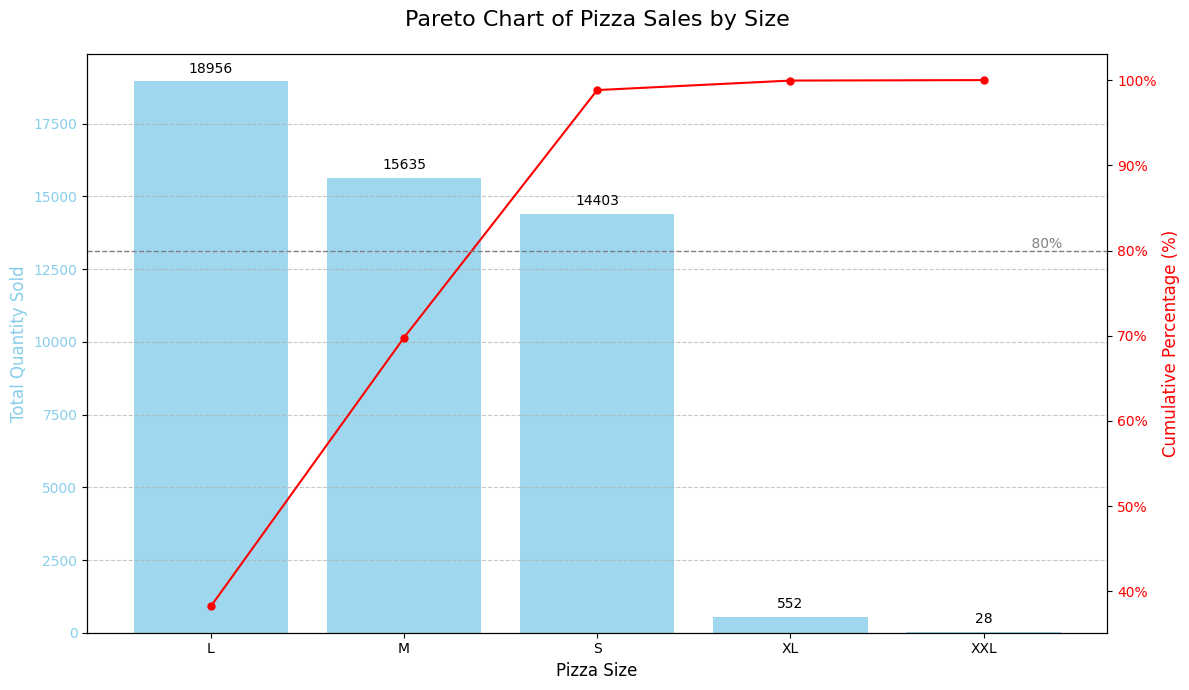

In [39]:

# 1. Group data by size and sum quantities, sort descending

size_dist = df.groupby('size')['quantity'].sum().sort_values(ascending=False)

# 2. Calculate cumulative percentage

cumulative_percentage = size_dist.cumsum() / size_dist.sum() * 100

# 3. Create the plot

fig, ax1 = plt.subplots(figsize=(12, 7))

# 4. Plot the bars (Primary Y-axis - Quantity)

color_bars = 'skyblue'
ax1.bar(size_dist.index, size_dist, color=color_bars, alpha=0.8)
ax1.set_xlabel('Pizza Size', fontsize=12)
ax1.set_ylabel('Total Quantity Sold', color=color_bars, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_bars)
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for quantity

# Add value labels on top of bars

for i, value in enumerate(size_dist):
    ax1.text(i, value + size_dist.max()*0.01, f'{value}', ha='center', va='bottom', fontsize=10)


# 5. Create the secondary Y-axis (Cumulative Percentage)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_line = 'red'
ax2.plot(size_dist.index, cumulative_percentage, color=color_line, marker='o', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)', color=color_line, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter()) # Format as percentage

# Optional: Add a line indicating 80% cumulative threshold

ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(ax1.get_xlim()[1]*0.95, 80, ' 80%', color='gray', va='bottom', ha='right')


# 6. Add Title and finalize layout

plt.title('Pareto Chart of Pizza Sales by Size', fontsize=16, pad=20)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()



### Insights 
- The Pareto Principle states concentrating 20% work to produce 80% result
- And this line chart visually explains that the sales is concentrated in the Large sized pizza than in the XL pizza; although for more clarity maybe a questionnaire should be shared to ensure there is clear understanding on what the differences could be from the customers

### ❓13. Spot the most sold pizza on a weekly basis

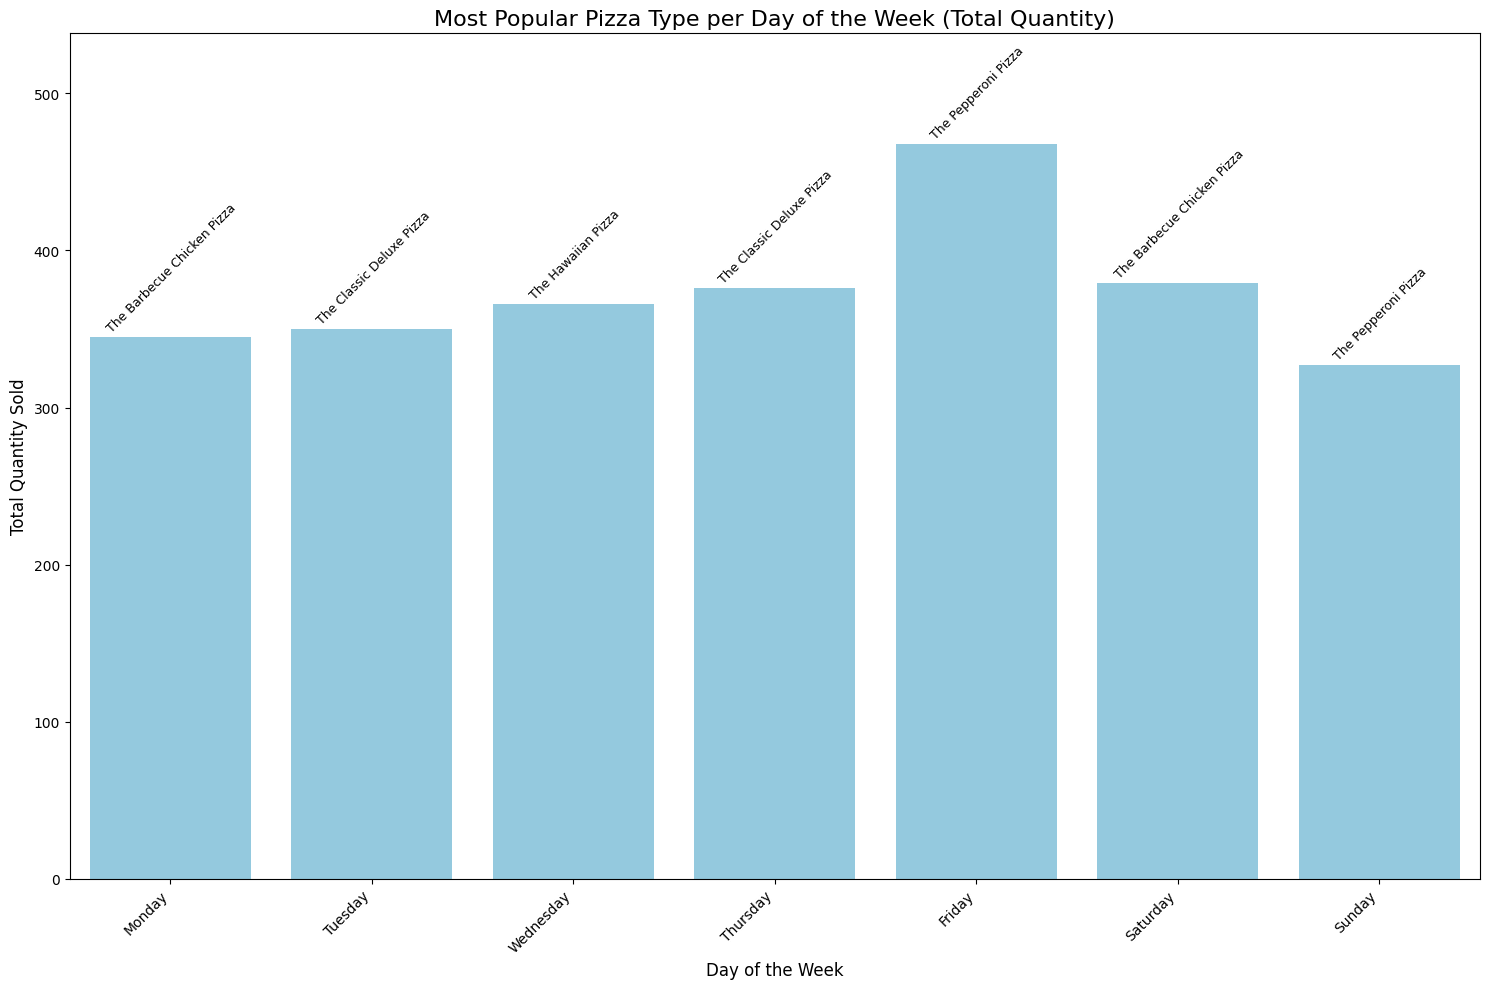

	Most Sold Pizza Type per Day of the Week:
day_of_week                       name  quantity
     Monday The Barbecue Chicken Pizza       345
    Tuesday   The Classic Deluxe Pizza       350
  Wednesday         The Hawaiian Pizza       366
   Thursday   The Classic Deluxe Pizza       376
     Friday        The Pepperoni Pizza       468
   Saturday The Barbecue Chicken Pizza       379
     Sunday        The Pepperoni Pizza       327


In [40]:
# Extract day of the week and week number
df['day_of_week'] = df['datetime'].dt.day_name()
df['week'] = df['datetime'].dt.isocalendar().week
df['year'] = df['datetime'].dt.year

# Define correct order for days (without 's')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Proceed with the original analysis for daily most sold pizza
daily_pizza_sales = df.groupby(['day_of_week', 'name'])['quantity'].sum().reset_index()
idx = daily_pizza_sales.groupby('day_of_week')['quantity'].idxmax()
most_sold_per_day = daily_pizza_sales.loc[idx]

# Ensure all days are included and ordered
all_days = pd.DataFrame({'day_of_week': day_order})
most_sold_per_day = pd.merge(all_days, most_sold_per_day, on='day_of_week', how='left').fillna({'quantity': 0, 'name': 'No Sales'})
most_sold_per_day['day_of_week'] = pd.Categorical(most_sold_per_day['day_of_week'], categories=day_order, ordered=True)
most_sold_per_day = most_sold_per_day.sort_values('day_of_week')

# Visualization for daily analysis
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='day_of_week', y='quantity', data=most_sold_per_day, color='skyblue', order=day_order)
plt.title('Most Popular Pizza Type per Day of the Week (Total Quantity)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')

for index, row in most_sold_per_day.iterrows():
    if row['quantity'] > 0:
        x_pos = day_order.index(row['day_of_week'])
        ax.text(x_pos, row['quantity'], f" {row['name']}", color='black', ha="center", va="bottom", rotation=45, fontsize=9)

plt.ylim(0, most_sold_per_day['quantity'].max() * 1.15)
plt.tight_layout()
plt.show()

print("\tMost Sold Pizza Type per Day of the Week:")
print(most_sold_per_day[['day_of_week', 'name', 'quantity']].to_string(index=False))

### ❓14. Show the most and least sold pizza in a graphic way

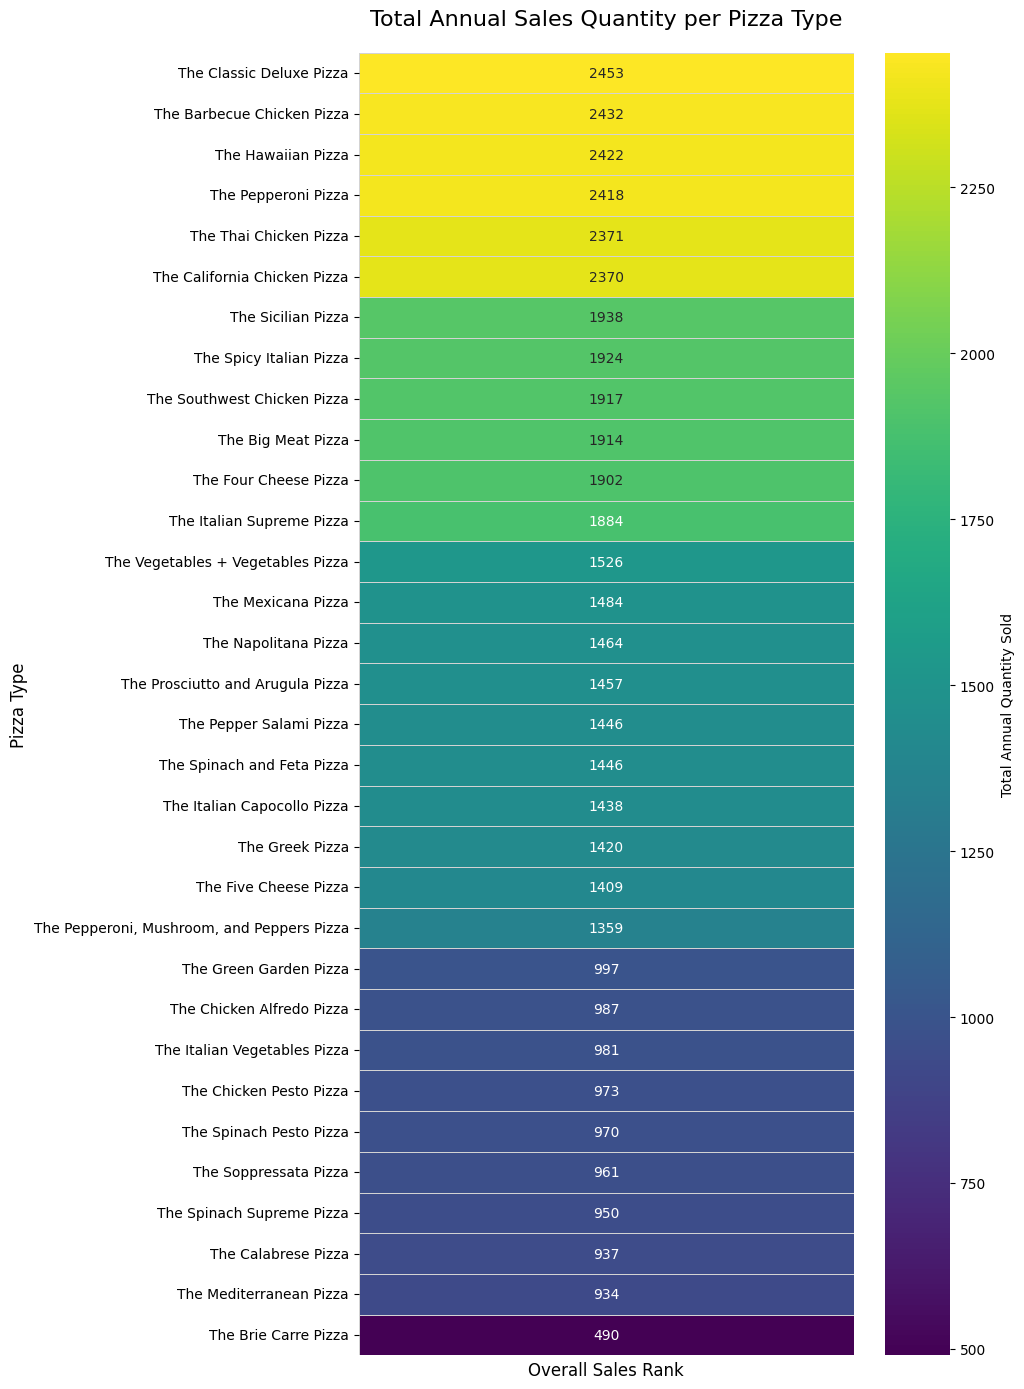

Total Annual Sales Quantity per Pizza Type (Sorted):
                                          name  quantity
7                     The Classic Deluxe Pizza      2453
0                   The Barbecue Chicken Pizza      2432
12                          The Hawaiian Pizza      2422
20                         The Pepperoni Pizza      2418
30                      The Thai Chicken Pizza      2371
4                 The California Chicken Pizza      2370
23                          The Sicilian Pizza      1938
26                     The Spicy Italian Pizza      1924
25                 The Southwest Chicken Pizza      1917
1                           The Big Meat Pizza      1914
9                        The Four Cheese Pizza      1902
14                   The Italian Supreme Pizza      1884
31           The Vegetables + Vegetables Pizza      1526
17                          The Mexicana Pizza      1484
18                        The Napolitana Pizza      1464
22            The Prosciutto and Ar

In [41]:
# --- Replace 'pizza_name' if your column is named differently ---
pizza_type_column = 'name' # <--- CHANGE THIS TO YOUR ACTUAL COLUMN NAME
# -------------------------------------------------------------

# 1. Calculate total annual quantity for each pizza type
#    We group by the pizza type and sum the quantities over the whole dataset.

annual_sales = df.groupby(pizza_type_column)['quantity'].sum().reset_index()

# 2. Sort by quantity (descending) to easily identify most and least sold
#    This helps in interpreting the heatmap and the printed output.

annual_sales_sorted = annual_sales.sort_values(by='quantity', ascending=False)

# 3. Prepare data for heatmap visualization
#    Set the pizza type as the index for better labeling on the heatmap's y-axis.
#    We need a DataFrame structure for the heatmap function.

heatmap_data = annual_sales_sorted.set_index(pizza_type_column)

# 4. Visualize using a heatmap
#    The heatmap will display pizza types on the y-axis and a single column
#    representing total quantity, colored by sales volume.

plt.figure(figsize=(10, 14)) # Adjust figsize (width, height) for readability
sns.heatmap(
    heatmap_data[['quantity']], # Pass the quantity column as a DataFrame slice
    annot=True,          # Display the quantity values directly on the heatmap
    fmt="d",             # Format the annotations as integers
    cmap="viridis",      # Choose a sequential color map (e.g., viridis, YlGnBu, Reds)
                         # 'viridis' goes from dark (low) to bright yellow (high)
    linewidths=.5,       # Add subtle lines between pizza types
    linecolor='lightgray',# Set line color
    cbar_kws={'label': 'Total Annual Quantity Sold'} # Add a label to the color bar
)

plt.title('Total Annual Sales Quantity per Pizza Type', fontsize=16, pad=20)
plt.xlabel('Overall Sales Rank', fontsize=12) # Clarify the single column's meaning
plt.ylabel('Pizza Type', fontsize=12)
plt.xticks([]) # Hide x-axis ticks as it represents a single metric
plt.yticks(rotation=0) # Keep pizza names horizontal for readability
plt.tight_layout()
plt.show()

# 5. Display the sorted table (optional, for precise numbers)

print("Total Annual Sales Quantity per Pizza Type (Sorted):")

# Using to_string() to ensure all pizzas are listed if the list is long

print(annual_sales_sorted.to_string())

# Explicitly identify least/no sold from the sorted data

most_sold = annual_sales_sorted.head()
least_sold_positive = annual_sales_sorted[annual_sales_sorted['quantity'] > 0].tail()
no_sold = annual_sales_sorted[annual_sales_sorted['quantity'] == 0]

print("\n--- Annual Sales Summary ---")
print("\nTop 5 Most Sold Pizza Types:")
print(most_sold.to_string())

print("\nBottom 5 Least Sold Pizza Types (with sales > 0):")
if least_sold_positive.empty:
    print("Not enough data or all pizzas sold similar low amounts.")
else:
    print(least_sold_positive.to_string())

if not no_sold.empty:
    print("\nPizza Types with Zero Sales Recorded:")
    print(no_sold.to_string())
elif annual_sales_sorted['quantity'].min() > 0:
    print("\nAll listed pizza types had at least one sale during the year.")
else:
     print("\nNo pizzas found with zero sales.") # Should not happen if min > 0 check passed



### ❓15. Spot the highest sales in that year and the most sold in that year

/tmp/ipykernel_29148/2167507720.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


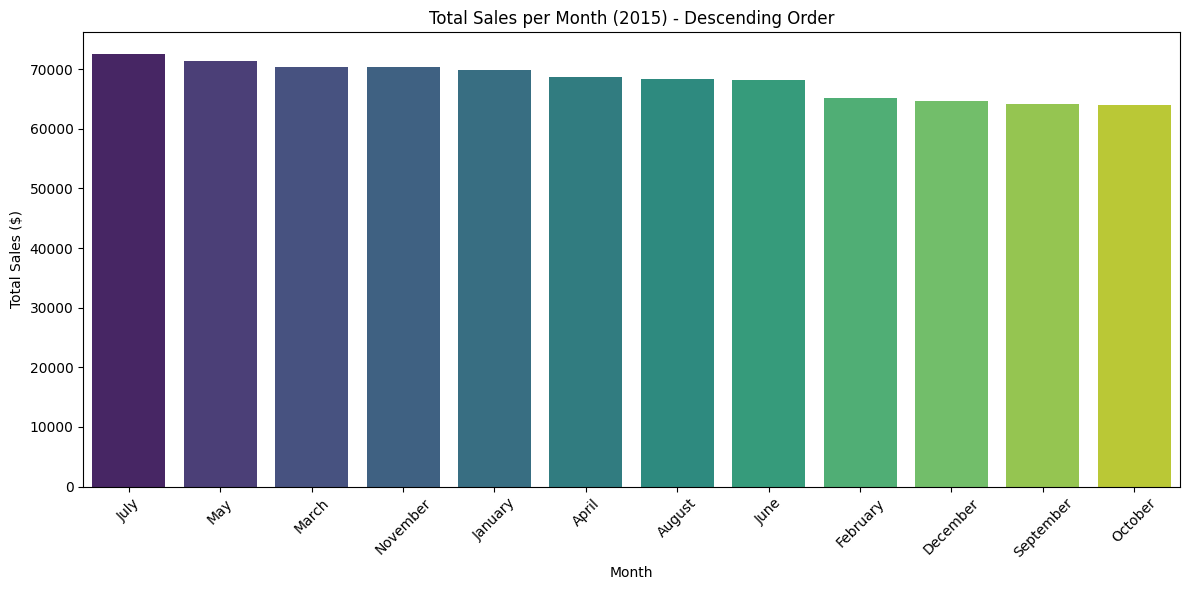

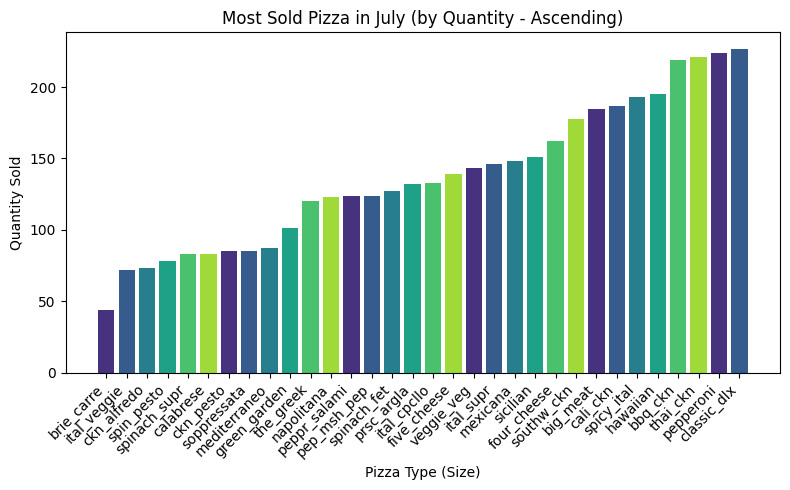

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('merged_dataset.csv', parse_dates=['datetime'])

# Extract month and calculate sales
df['month'] = df['datetime'].dt.month_name()
df['sales'] = df['price'] * df['quantity']

# Monthly sales (sorted descendingly)
monthly_sales = (
    df.groupby('month', as_index=False)['sales']
    .sum()
    .sort_values('sales', ascending=False)
)

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_sales,
    x='month',
    y='sales',
    palette='viridis',
    order=monthly_sales['month']  # Force descending order
)
plt.title('Total Sales per Month (2015) - Descending Order')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()
# Top month
top_month = monthly_sales.loc[monthly_sales['sales'].idxmax()]

# Filter top month data
top_month_data = df[df['month'] == top_month['month']]
pizza_sales = top_month_data.groupby('pizza_type_id', as_index=False)['quantity'].sum()

# Sort pizza sales by quantity in ascending order
pizza_sales_sorted = pizza_sales.sort_values(by='quantity')

plt.figure(figsize=(8, 5))
plt.bar(pizza_sales_sorted['pizza_type_id'], pizza_sales_sorted['quantity'], color=sns.color_palette('viridis'))
plt.title(f'Most Sold Pizza in {top_month["month"]} (by Quantity - Ascending)')
plt.xlabel('Pizza Type (Size)')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Insights
  * July has the highest sales and it is notable that during summer & spring sales went up than other seasons
  * In July, the most purchased was Classic_deluxe

### ❓16. Display most sold pizza each month

,month_year,name,quantity
0,2015-01,The Barbecue Chicken Pizza,211
1,2015-01,The Big Meat Pizza,150
2,2015-01,The Brie Carre Pizza,35
3,2015-01,The Calabrese Pizza,67
4,2015-01,The California Chicken Pizza,202
5,2015-01,The Chicken Alfredo Pizza,86
6,2015-01,The Chicken Pesto Pizza,77
7,2015-01,The Classic Deluxe Pizza,190
8,2015-01,The Five Cheese Pizza,138
9,2015-01,The Four Cheese Pizza,159


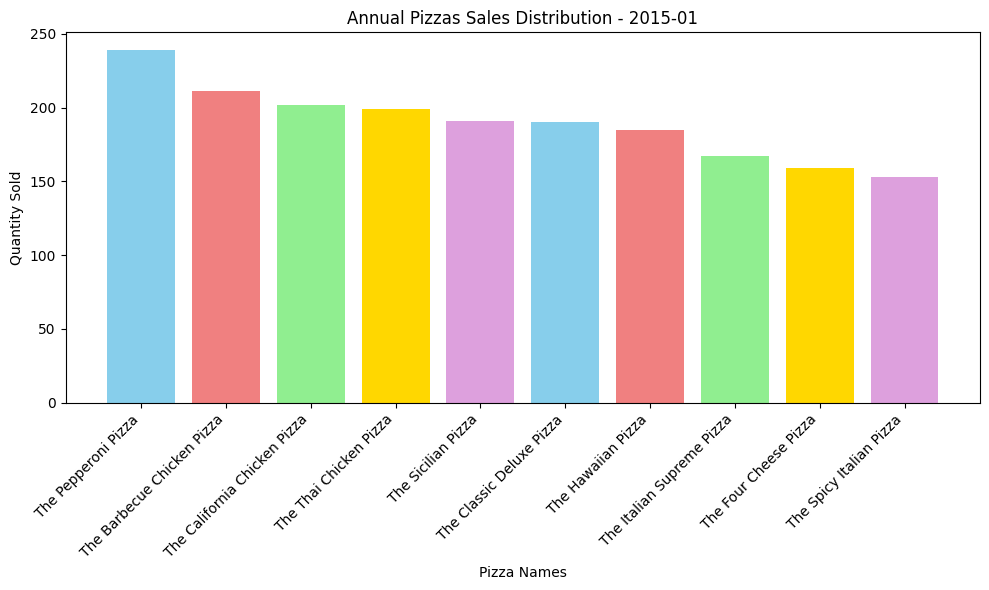

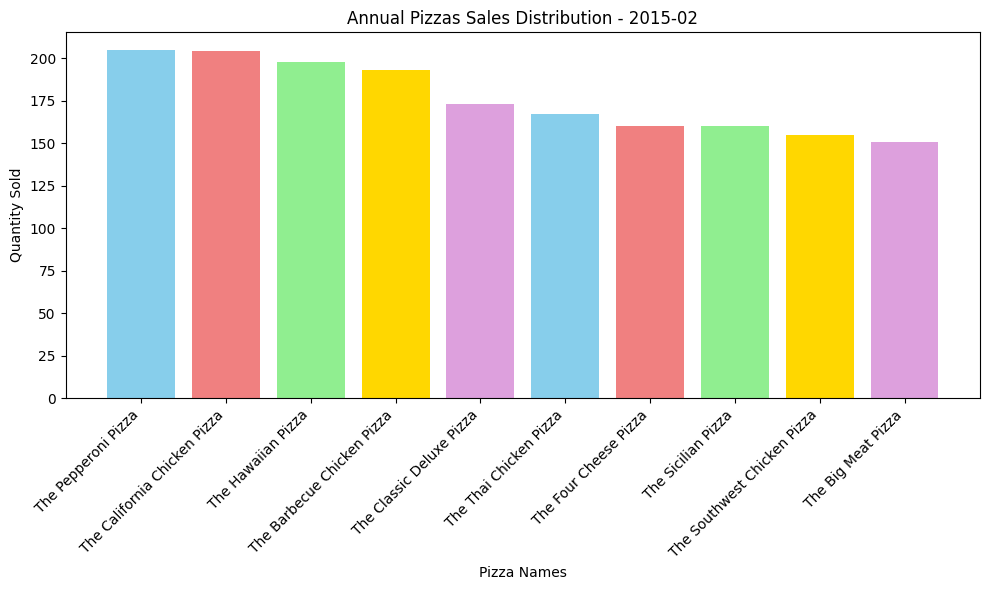

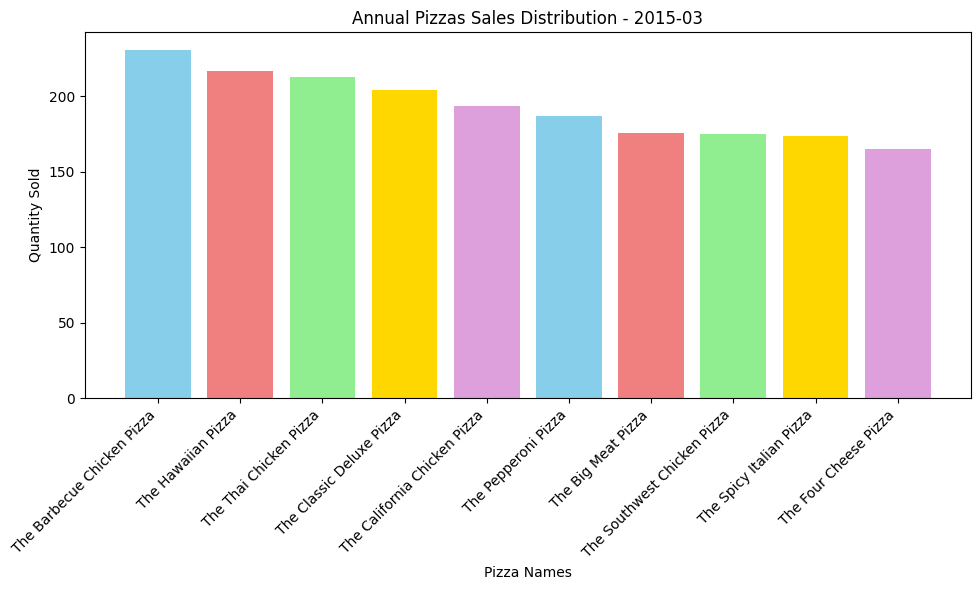

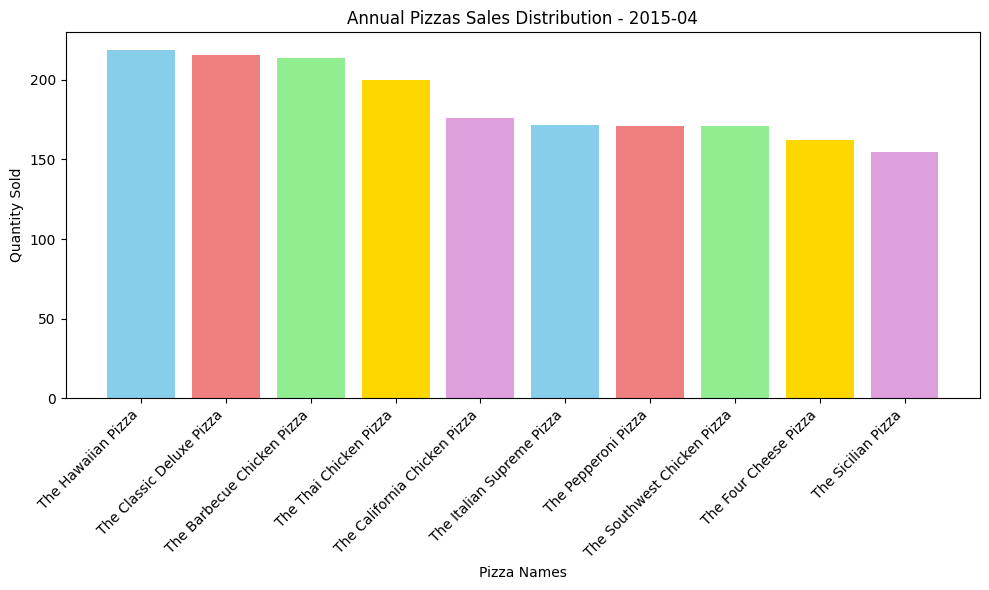

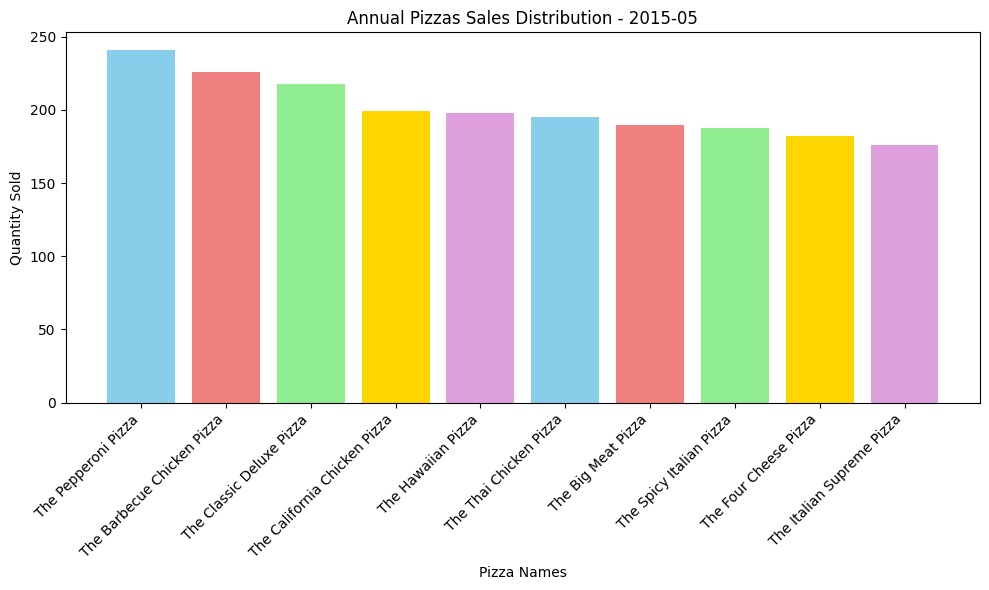

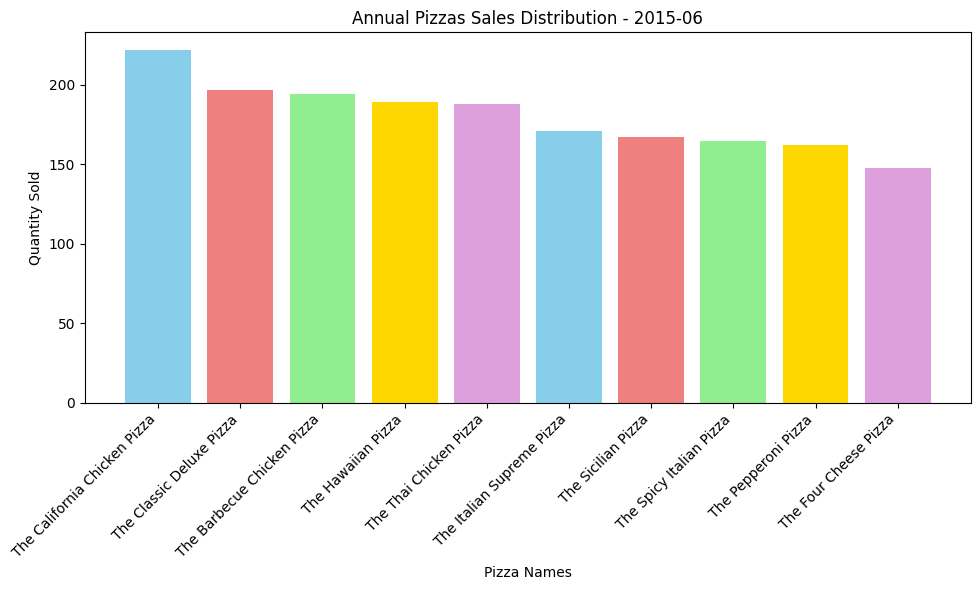

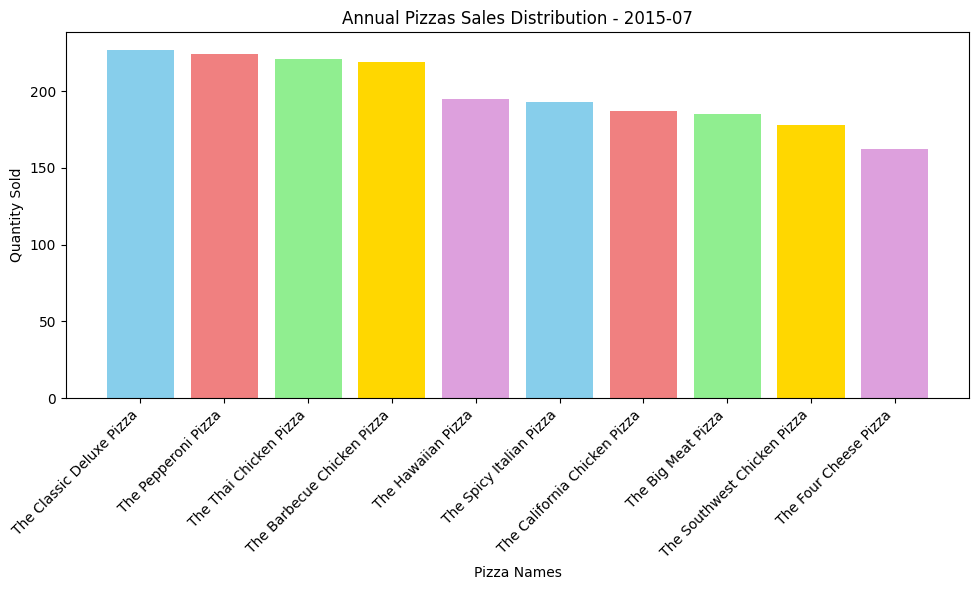

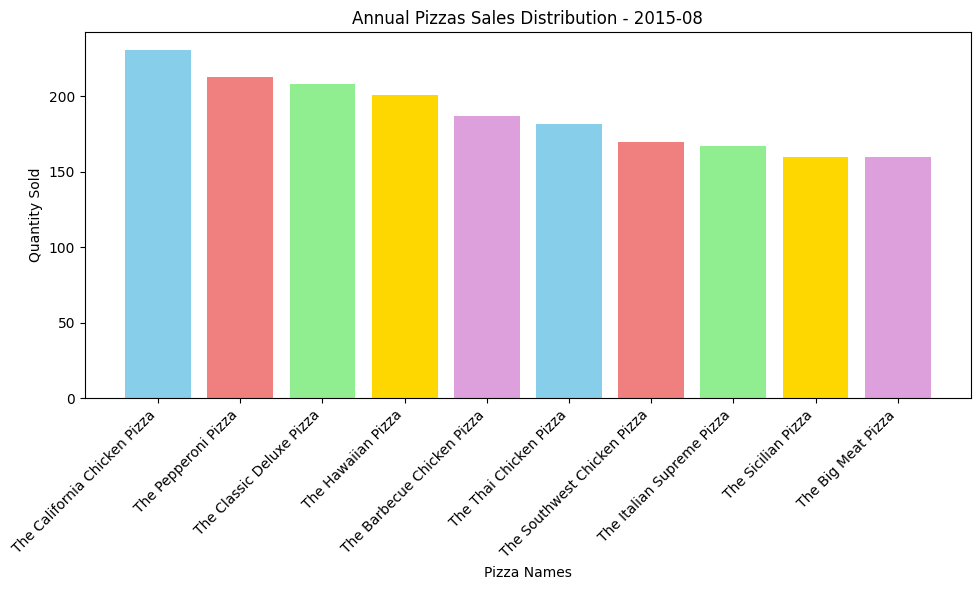

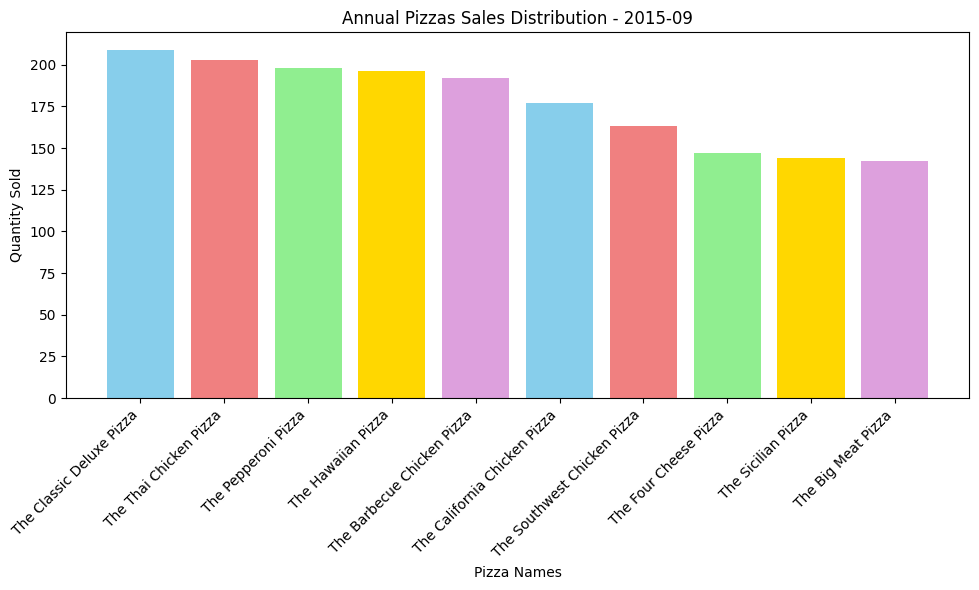

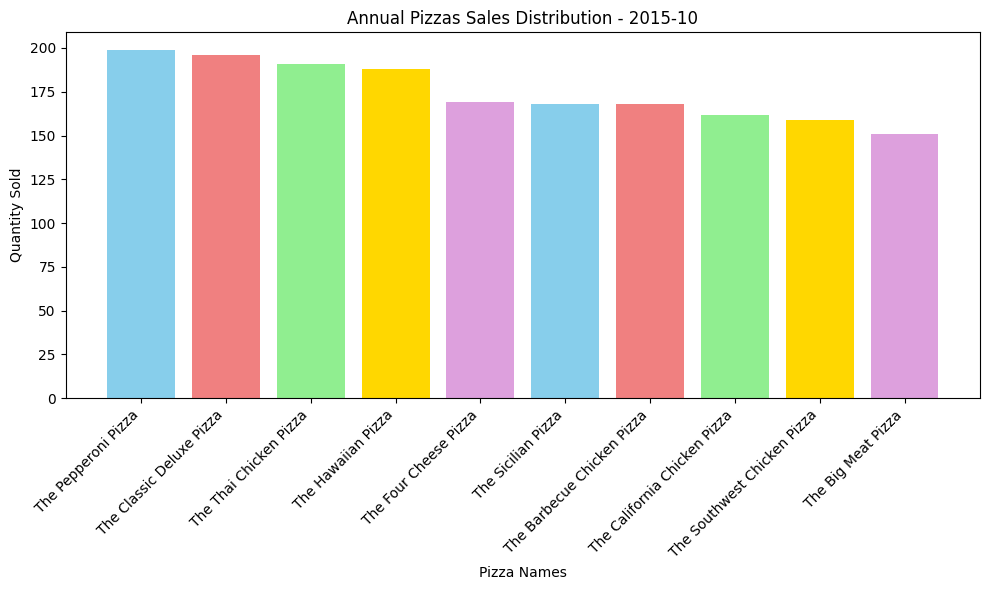

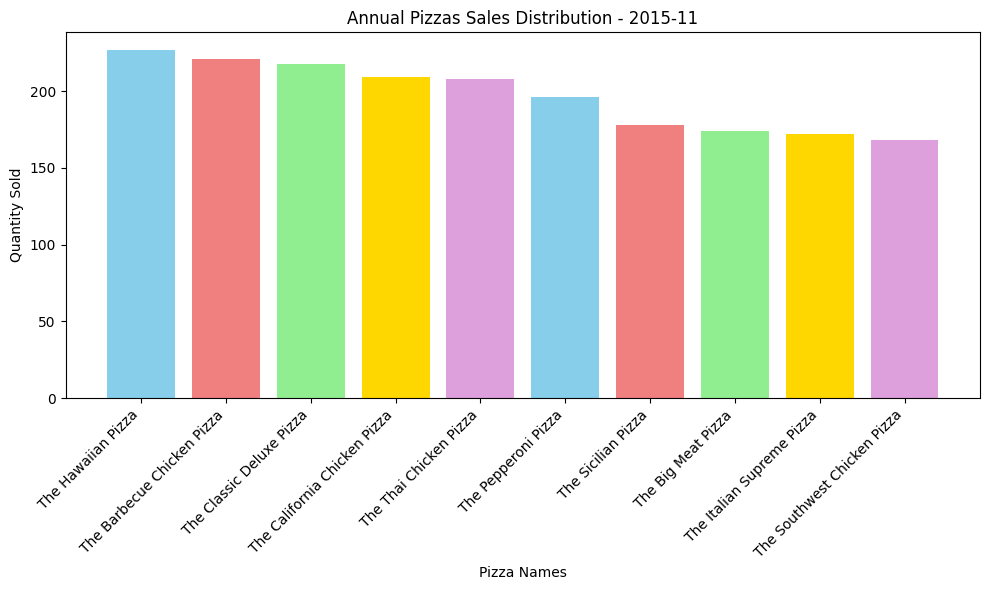

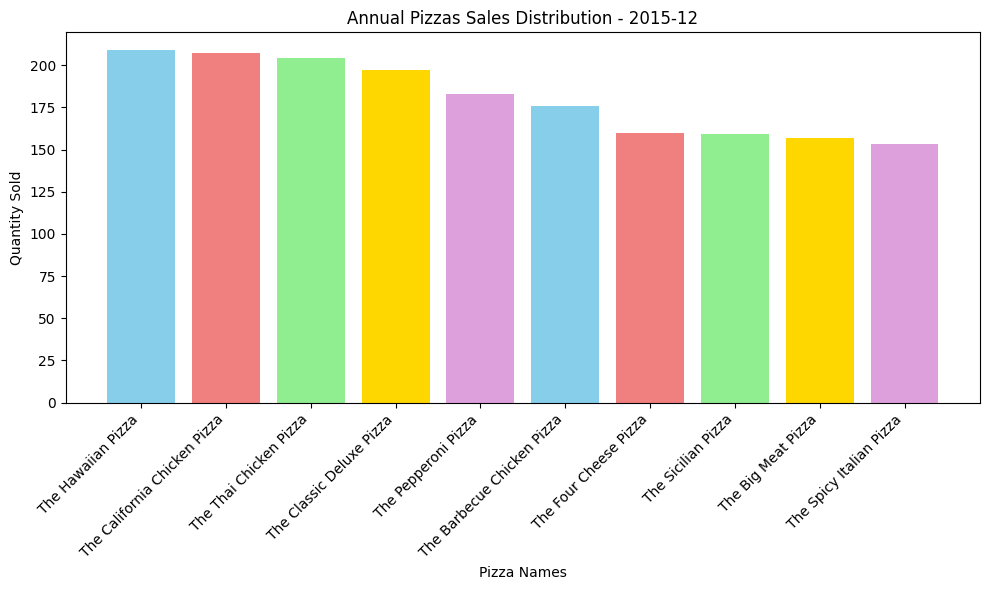

In [43]:
# Extract month and year
df['month_year'] = df['datetime'].dt.strftime('%Y-%m')

# Group data and calculate total quantity
monthly_pizza_sales = df.groupby(['month_year', 'name'])['quantity'].sum().reset_index()

# Display the first few rows of the new DataFrame
display(monthly_pizza_sales.head(10))
top_12_pizzas_by_month = {}
for month in monthly_pizza_sales['month_year'].unique():
    monthly_data = monthly_pizza_sales[monthly_pizza_sales['month_year'] == month]
    monthly_data_sorted = monthly_data.sort_values(by='quantity', ascending=False)
    top_12_pizzas = []
    for index, row in monthly_data_sorted.iterrows():
        top_12_pizzas.append((row['name'], row['quantity']))
    top_12_pizzas_by_month[month] = top_12_pizzas[:10]


# Assuming top_12_pizzas_by_month is already created from previous steps

# Get the annual sold pizza
months = list(top_12_pizzas_by_month.keys())[:12]

for month in months:
    pizza_names = [pizza[0] for pizza in top_12_pizzas_by_month[month]]
    quantities = [pizza[1] for pizza in top_12_pizzas_by_month[month]]

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(pizza_names, quantities, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
    plt.xlabel("Pizza Names")
    plt.ylabel("Quantity Sold")
    plt.title(f"Annual Pizzas Sales Distribution - {month}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f"top_12_pizzas_{month}.png")
    plt.show()